In [2]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

hfb = h5py.File('../../clustering/lhc-olympics-preprocessing/images64_8_rsn066/bkg_imgs.h5', 'r')
hfs = h5py.File('../../clustering/lhc-olympics-preprocessing/images64_8_rsn066/sig_imgs.h5', 'r')
sig = hfs.get('multijet').value 
bkg = hfb.get('multijet').value 

n_sig = sig.shape[0]

x = np.concatenate([sig, bkg[:n_sig]])
y = np.concatenate([np.ones(n_sig), np.zeros(n_sig)])

X_train, X_test, y_train, y_test \
    = train_test_split(x, y, test_size=0.33, random_state=1)

X_train, X_valid, y_train, y_valid  \
    = train_test_split(x, y, test_size=0.2, random_state=1)

<ipython-input-2-90a53b5f6b64>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  sig = hfs.get('multijet').value
<ipython-input-2-90a53b5f6b64>:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  bkg = hfb.get('multijet').value


In [7]:
batch_size = 32
img_height = 64
img_width = 64

num_classes = 2

model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  x=X_train, y=y_train,
  validation_data=(X_valid, y_valid),
  epochs=epochs,
  batch_size=batch_size)




Epoch 1/10
5000/5000 [==============================] - 60s 3ms/step - loss: 0.3843 - accuracy: 0.8264 - val_loss: 0.3008 - val_accuracy: 0.8739
Epoch 2/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2823 - accuracy: 0.8847 - val_loss: 0.2499 - val_accuracy: 0.8988
Epoch 3/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2488 - accuracy: 0.9006 - val_loss: 0.2229 - val_accuracy: 0.9110
Epoch 4/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.2277 - accuracy: 0.9096 - val_loss: 0.2540 - val_accuracy: 0.8984
Epoch 5/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.2124 - accuracy: 0.9162 - val_loss: 0.1964 - val_accuracy: 0.9222
Epoch 6/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2026 - accuracy: 0.9206 - val_loss: 0.2038 - val_accuracy: 0.9196
Epoch 7/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.1928 - accuracy: 0.9241 - val_loss: 0.1855 - val_ac

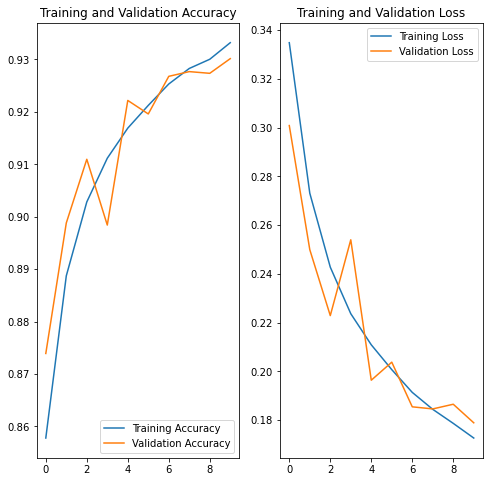

In [8]:
# %%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.close()

In [16]:
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(y_test, y_score.reshape(-1,1))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [66000, 132000]